In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline

Preprocessed dataset. 3642 records.

TargetClass - Whether the Star is Dwarf (0) or Giant (1)

B-V - B-V color index.

Vmag=Visual Apparent Magnitude of the Star

Amag - Absolute Magnitude of the Star.
The absolute magnitude of the stars were generated via the equation:

M = m + 5(logP + 1)

Where M represents the absolute magnitude Amag,
m represents the visual apparent magnitude Vmag
and p represents stellar parallax Plx.

Star Number 3642

In [2]:
dataset=pd.read_csv('Star3642_balanced.csv')

In [3]:
dataset

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


In [4]:
dataset=dataset.drop(['SpType'],axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   Amag         3642 non-null   float64
 5   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.8 KB


In [6]:
dataset.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


In [7]:
dataset.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
Amag           0
TargetClass    0
dtype: int64

<Axes: >

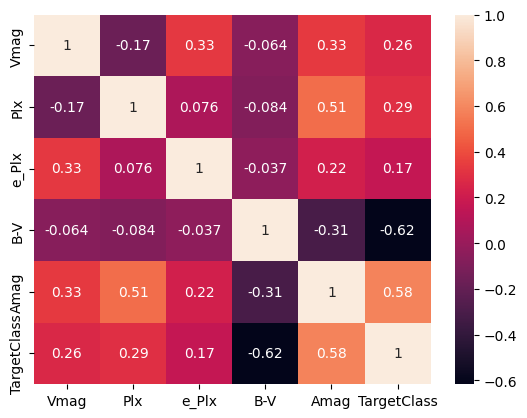

In [8]:
sns.heatmap(dataset.corr(),annot=True)

In [9]:
#sns.pairplot(dataset)

In [10]:
dataset

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,5.99,13.73,0.58,1.318,16.678352,0
1,8.70,2.31,1.29,-0.045,15.518060,0
2,5.77,5.50,1.03,0.855,14.471813,0
3,6.72,5.26,0.74,-0.015,15.324928,1
4,8.76,13.44,1.16,0.584,19.401997,1
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,14.856089,0
3638,8.29,6.38,1.00,0.408,17.314104,1
3639,6.11,2.42,0.79,1.664,13.029078,0
3640,7.94,4.94,2.90,0.210,16.408636,1


<Axes: xlabel='TargetClass', ylabel='count'>

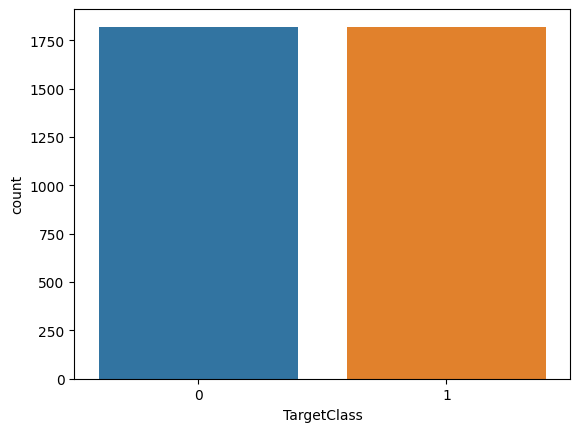

In [11]:
sns.countplot(x='TargetClass',data=dataset)

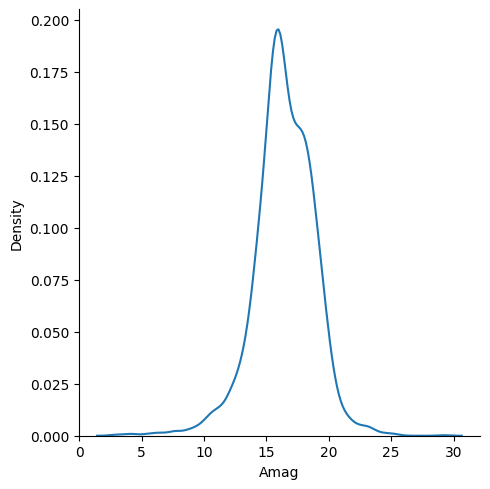

In [12]:
sns.displot(dataset['Amag'],kind='kde')

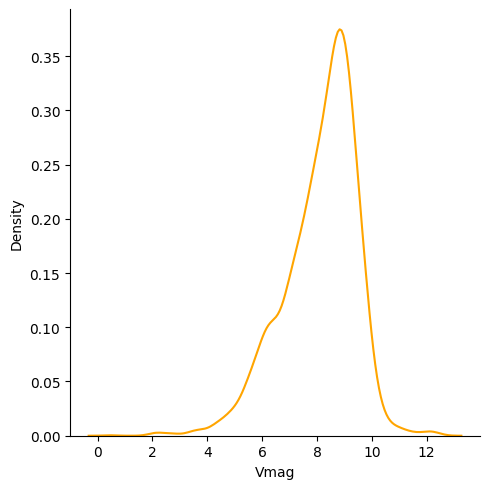

In [13]:
sns.displot(dataset['Vmag'],kind='kde',color='orange' )

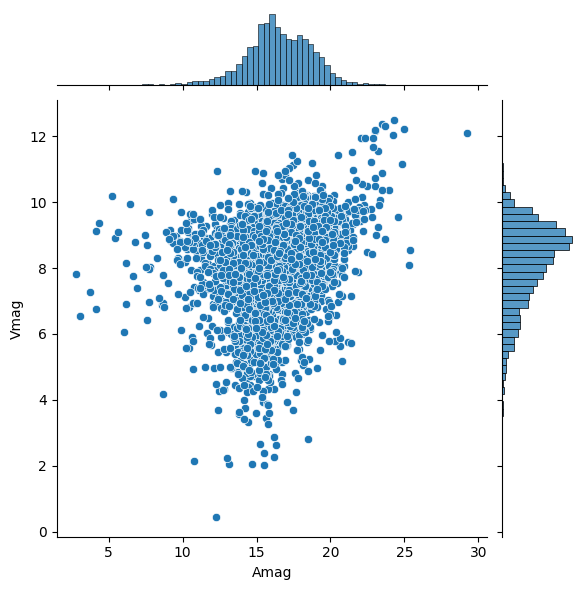

In [14]:
sns.jointplot(data=dataset,x='Amag',y='Vmag')

In [15]:
dataset

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,5.99,13.73,0.58,1.318,16.678352,0
1,8.70,2.31,1.29,-0.045,15.518060,0
2,5.77,5.50,1.03,0.855,14.471813,0
3,6.72,5.26,0.74,-0.015,15.324928,1
4,8.76,13.44,1.16,0.584,19.401997,1
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,14.856089,0
3638,8.29,6.38,1.00,0.408,17.314104,1
3639,6.11,2.42,0.79,1.664,13.029078,0
3640,7.94,4.94,2.90,0.210,16.408636,1


In [16]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [17]:
X

array([[ 5.99    , 13.73    ,  0.58    ,  1.318   , 16.678352],
       [ 8.7     ,  2.31    ,  1.29    , -0.045   , 15.51806 ],
       [ 5.77    ,  5.5     ,  1.03    ,  0.855   , 14.471813],
       ...,
       [ 6.11    ,  2.42    ,  0.79    ,  1.664   , 13.029078],
       [ 7.94    ,  4.94    ,  2.9     ,  0.21    , 16.408636],
       [ 8.81    ,  1.87    ,  1.23    ,  1.176   , 15.169209]])

In [18]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr=LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8930041152263375

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[328  42]
 [ 36 323]]


In [28]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       370
           1       0.88      0.90      0.89       359

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



In [29]:
from sklearn.svm import SVC

In [30]:
svc=SVC()

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.18 %
Best Parameters: {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}


In [32]:
svc=SVC(C=1, kernel='rbf',gamma = 0.2)

In [33]:
svc.fit(X_train,y_train)

SVC(C=1, gamma=0.2)

In [34]:
y_svc=svc.predict(X_test)

In [35]:
print(np.concatenate((y_svc.reshape(len(y_svc),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_svc)

0.8888888888888888

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_svc))


[[328  42]
 [ 39 320]]


In [38]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_svc))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       370
           1       0.88      0.89      0.89       359

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gb=GaussianNB()

In [41]:
gb.fit(X_train,y_train)

GaussianNB()

In [42]:
y_gb=gb.predict(X_test)

In [43]:
print(np.concatenate((y_gb.reshape(len(y_gb),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_gb)

0.8573388203017832

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_gb))

[[340  30]
 [ 74 285]]


In [46]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_gb))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       370
           1       0.90      0.79      0.85       359

    accuracy                           0.86       729
   macro avg       0.86      0.86      0.86       729
weighted avg       0.86      0.86      0.86       729



In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn=KNeighborsClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": np.arange(1,3),
              "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=knn,
                        param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)


0.8575274236235139
2


In [50]:
knn=KNeighborsClassifier(n_neighbors=2,metric='minkowski')

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
y_knn=knn.predict(X_test)

In [53]:
print(np.concatenate((y_knn.reshape(len(y_knn),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn)

0.8559670781893004

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_knn))

[[338  32]
 [ 73 286]]


In [56]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       370
           1       0.90      0.80      0.84       359

    accuracy                           0.86       729
   macro avg       0.86      0.86      0.86       729
weighted avg       0.86      0.86      0.86       729



In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier(criterion='entropy')

In [59]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [60]:
y_dt=dt.predict(X_test)

In [61]:
print(np.concatenate((y_dt.reshape(len(y_dt),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_dt)

0.8422496570644719

In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_dt))

[[307  63]
 [ 52 307]]


In [64]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       370
           1       0.90      0.80      0.84       359

    accuracy                           0.86       729
   macro avg       0.86      0.86      0.86       729
weighted avg       0.86      0.86      0.86       729



In [65]:
from sklearn.ensemble import  RandomForestClassifier

In [66]:
rf= RandomForestClassifier(n_estimators=300,criterion='entropy')

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [68]:
y_rf=rf.predict(X_test)

In [69]:
print(np.concatenate((y_rf.reshape(len(y_rf),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_rf)

0.8861454046639232

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_rf))

[[328  42]
 [ 41 318]]


In [72]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       370
           1       0.88      0.89      0.88       359

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gb=GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=300)

In [75]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=300)

In [76]:
y_gb=gb.predict(X_test)

In [77]:
print(np.concatenate((y_gb.reshape(len(y_gb),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_gb)

0.8916323731138546

In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_gb))

[[331  39]
 [ 40 319]]


In [80]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_gb))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       370
           1       0.89      0.89      0.89       359

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



In [81]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [82]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_xg=xg.predict(X_test)

In [84]:
print(np.concatenate((y_xg.reshape(len(y_xg),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [85]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_xg)

0.877914951989026

In [86]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_xg))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       370
           1       0.88      0.87      0.88       359

    accuracy                           0.88       729
   macro avg       0.88      0.88      0.88       729
weighted avg       0.88      0.88      0.88       729



In [87]:
ann=tf.keras.models.Sequential()

In [88]:
ann.add(tf.keras.layers.Dense(activation='relu',units=6))

In [89]:
ann.add(tf.keras.layers.Dense(activation='relu',units=6))

In [90]:
ann.add(tf.keras.layers.Dense(activation='sigmoid',units=1))

In [91]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
92/92 [==============================] - 2s 3ms/step - loss: 0.6623 - accuracy: 0.6042
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.8232
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.8867
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8929
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8936
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8970
Epoch 7/100
92/92 [==============================] - 14s 150ms/step - loss: 0.3002 - accuracy: 0.8967
Epoch 8/100
92/92 [==============================] - 0s 4ms/step - loss: 0.2937 - accuracy: 0.8987
Epoch 9/100
92/92 [==============================] - 2s 20ms/step - loss: 0.2901 - accuracy: 0.8998
Epoch 10/100
92/92 [==============================] - 2s 22ms/step - loss: 0.2878 - accuracy: 0.8984
Epoc

In [93]:
y_ann=ann.predict(X_test)

23/23 [==============================] - 1s 41ms/step


In [94]:
y_ann

array([[2.34791562e-01],
       [9.92578745e-01],
       [2.73600370e-02],
       [9.79930162e-01],
       [9.80756164e-01],
       [3.62363793e-02],
       [9.54082906e-01],
       [2.84642369e-01],
       [1.54182702e-01],
       [2.25476012e-01],
       [9.70281363e-01],
       [3.81237239e-01],
       [1.02234855e-02],
       [9.45711792e-01],
       [4.52683382e-02],
       [9.93631065e-01],
       [1.00814909e-01],
       [1.19257607e-02],
       [9.81591880e-01],
       [1.03284307e-01],
       [6.19515814e-02],
       [1.12775043e-02],
       [8.47480953e-01],
       [7.71787286e-01],
       [9.94222224e-01],
       [7.97491193e-01],
       [1.12349302e-01],
       [9.84041631e-01],
       [2.84208357e-01],
       [5.39507307e-02],
       [8.85403752e-02],
       [2.28950158e-02],
       [9.76261497e-01],
       [2.69390754e-02],
       [8.36236238e-01],
       [2.96777010e-01],
       [9.85679686e-01],
       [8.99335206e-01],
       [3.93863581e-02],
       [8.57157540e-03],


In [95]:
y_ann=(y_ann>0.5)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_ann)

0.8943758573388203

##Star39552

In [97]:
dataset1=pd.read_csv('Star39552_balanced.csv')

In [98]:
dataset1

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [99]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [100]:
dataset1=dataset1.drop(['SpType'],axis=1)

In [101]:
dataset1

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,10.00,31.66,6.19,1.213,22.502556,1
1,8.26,3.21,1.00,1.130,15.792525,0
2,8.27,12.75,1.06,0.596,18.797552,1
3,6.54,5.23,0.76,1.189,15.132508,0
4,8.52,0.96,0.72,0.173,13.431356,1
...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,6.982245,0
39548,7.05,18.12,0.92,0.424,18.340790,1
39549,9.21,3.89,1.46,0.227,17.159748,1
39550,9.01,2.13,1.46,1.467,15.651898,0


In [102]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   Amag         39552 non-null  float64
 5   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


In [103]:
dataset.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
Amag           0
TargetClass    0
dtype: int64

<Axes: xlabel='TargetClass', ylabel='count'>

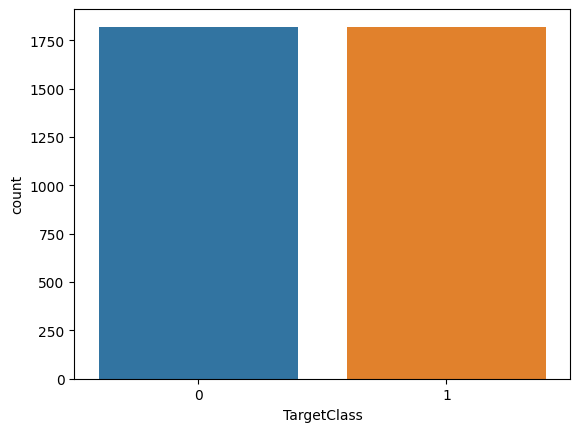

In [104]:
sns.countplot(data=dataset,x='TargetClass')

<Axes: >

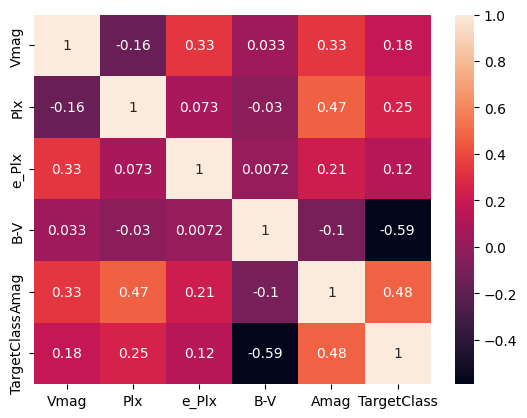

In [105]:
sns.heatmap(dataset1.corr(),annot=True)

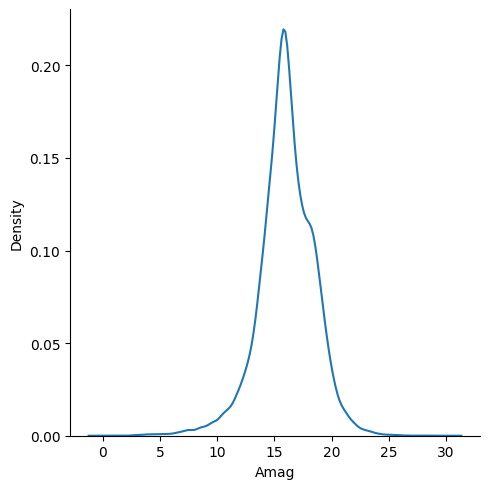

In [106]:
sns.displot(dataset1['Amag'],kind='kde')

In [107]:
dataset1

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,10.00,31.66,6.19,1.213,22.502556,1
1,8.26,3.21,1.00,1.130,15.792525,0
2,8.27,12.75,1.06,0.596,18.797552,1
3,6.54,5.23,0.76,1.189,15.132508,0
4,8.52,0.96,0.72,0.173,13.431356,1
...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,6.982245,0
39548,7.05,18.12,0.92,0.424,18.340790,1
39549,9.21,3.89,1.46,0.227,17.159748,1
39550,9.01,2.13,1.46,1.467,15.651898,0


In [108]:
X1=dataset1.iloc[:,0:5].values
y1=dataset1.iloc[:,-1].values


In [109]:
X1

array([[10.      , 31.66    ,  6.19    ,  1.213   , 22.502556],
       [ 8.26    ,  3.21    ,  1.      ,  1.13    , 15.792525],
       [ 8.27    , 12.75    ,  1.06    ,  0.596   , 18.797552],
       ...,
       [ 9.21    ,  3.89    ,  1.46    ,  0.227   , 17.159748],
       [ 9.01    ,  2.13    ,  1.46    ,  1.467   , 15.651898],
       [ 9.12    ,  3.82    ,  0.79    ,  0.48    , 17.030317]])

In [110]:
y1

array([1, 0, 1, ..., 1, 0, 1])

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
logi=LogisticRegression()

In [115]:
logi.fit(X_train,y_train)

LogisticRegression()

In [116]:
y_logi=logi.predict(X_test)

In [117]:
print(np.concatenate((y_logi.reshape(len(y_logi),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_logi)

0.8809252938945772

In [119]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_logi))

[[3357  556]
 [ 386 3612]]


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_logi))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3913
           1       0.87      0.90      0.88      3998

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [121]:
from sklearn.svm import SVC

In [122]:
sv=SVC(C=1, kernel='rbf',gamma = 0.2)

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = sv,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [123]:
sv.fit(X_train,y_train)

SVC(C=1, gamma=0.2)

In [124]:
y_sv=svc.predict(X_test)

In [125]:
print(np.concatenate((y_sv.reshape(len(y_sv),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_sv)

0.8781443559600556

In [127]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_sv))

[[3402  511]
 [ 453 3545]]


In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_sv))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3913
           1       0.87      0.89      0.88      3998

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
gauss=GaussianNB()

In [131]:
gauss.fit(X_train,y_train)

GaussianNB()

In [132]:
y_gauss=gauss.predict(X_test)

In [133]:
print(np.concatenate((y_gauss.reshape(len(y_gauss),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_gauss)

0.8000252812539502

In [135]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_gauss))

[[3642  271]
 [1311 2687]]


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_gauss))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82      3913
           1       0.91      0.67      0.77      3998

    accuracy                           0.80      7911
   macro avg       0.82      0.80      0.80      7911
weighted avg       0.82      0.80      0.80      7911



In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dtc=DecisionTreeClassifier(criterion='entropy')

In [139]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [140]:
y_dtc=dtc.predict(X_test)

In [141]:
print(np.concatenate((y_dtc.reshape(len(y_dtc),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_dtc)

0.8141827834660599

In [143]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_dtc))

[[3195  718]
 [ 752 3246]]


In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_dtc))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3913
           1       0.82      0.81      0.82      3998

    accuracy                           0.81      7911
   macro avg       0.81      0.81      0.81      7911
weighted avg       0.81      0.81      0.81      7911



In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rfc=RandomForestClassifier(n_estimators=400, criterion='entropy')

In [147]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [148]:
y_rfc=rfc.predict(X_test)

In [149]:
print(np.concatenate((y_rfc.reshape(len(y_rfc),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_rfc)

0.8816837315130831

In [151]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_rfc))

[[3375  538]
 [ 398 3600]]


In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3913
           1       0.87      0.90      0.88      3998

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
kne=KNeighborsClassifier()

In [155]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": np.arange(1,3),
              "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=knn,
                        param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)


0.8283869737341745
1


In [156]:
kne=KNeighborsClassifier(n_neighbors=1)

In [157]:
kne.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [158]:
y_kne=kne.predict(X_test)

In [159]:
print(np.concatenate((y_kne.reshape(len(y_kne),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_kne)

0.8290987232966756

In [161]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_kne))

[[3232  681]
 [ 671 3327]]


In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_kne))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3913
           1       0.83      0.83      0.83      3998

    accuracy                           0.83      7911
   macro avg       0.83      0.83      0.83      7911
weighted avg       0.83      0.83      0.83      7911



In [163]:
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
gra=GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=400)

In [165]:
gra.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=400)

In [166]:
y_gra=gra.predict(X_test)

In [167]:
print(np.concatenate((y_gra.reshape(len(y_gra),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_gra)

0.8834534192895968

In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_gra))

[[3359  554]
 [ 368 3630]]


In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_gra))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3913
           1       0.87      0.91      0.89      3998

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [171]:
from xgboost import XGBClassifier
xc = XGBClassifier()

In [172]:
xc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [173]:
y_xc=xc.predict(X_test)

In [174]:
print(np.concatenate((y_xc.reshape(len(y_xc),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_xc)

0.881936544052585

In [176]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_xc))

[[3387  526]
 [ 408 3590]]


In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_xc))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3913
           1       0.87      0.90      0.88      3998

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [178]:
nn=tf.keras.models.Sequential()

In [179]:
nn.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [180]:
nn.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [181]:
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [182]:
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [183]:
nn.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
989/989 [==============================] - 8s 7ms/step - loss: 0.4094 - accuracy: 0.8279
Epoch 2/100
989/989 [==============================] - 3s 3ms/step - loss: 0.3192 - accuracy: 0.8768
Epoch 3/100
989/989 [==============================] - 3s 3ms/step - loss: 0.3163 - accuracy: 0.8777
Epoch 4/100
989/989 [==============================] - 10s 10ms/step - loss: 0.3147 - accuracy: 0.8785
Epoch 5/100
989/989 [==============================] - 15s 15ms/step - loss: 0.3132 - accuracy: 0.8785
Epoch 6/100
989/989 [==============================] - 14s 14ms/step - loss: 0.3122 - accuracy: 0.8784
Epoch 7/100
989/989 [==============================] - 9s 9ms/step - loss: 0.3117 - accuracy: 0.8783
Epoch 8/100
989/989 [==============================] - 13s 14ms/step - loss: 0.3112 - accuracy: 0.8786
Epoch 9/100
989/989 [==============================] - 10s 10ms/step - loss: 0.3106 - accuracy: 0.8780
Epoch 10/100
989/989 [==============================] - 17s 17ms/step - loss: 0.3

In [184]:
y_nn=nn.predict(X_test)

248/248 [==============================] - 0s 2ms/step


In [185]:
y_nn=(y_nn>0.5)

In [186]:
y_nn

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [187]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_nn)

0.8828213879408419

Preprocessed dataset. 3642 records.

TargetClass - Whether the Star is Dwarf (0) or Giant (1)

B-V - B-V color index.

Vmag=Visual Apparent Magnitude of the Star

Amag - Absolute Magnitude of the Star.
The absolute magnitude of the stars were generated via the equation:

M = m + 5(logP + 1)

Where M represents the absolute magnitude Amag,
m represents the visual apparent magnitude Vmag
and p represents stellar parallax Plx.